In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib pathlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import tensorflow as tf
import os
os.getcwd()

'C:\\Users\\kamry\\ML_ImageClass'

In [12]:
os.chdir('C:\\Users\\kamry\\ML_ImageClass\\Data\\Dog_Pics\\images\\Images')
print(os.getcwd())

C:\Users\kamry\ML_ImageClass\Data\Dog_Pics\images\Images


In [13]:
#CV is computer vision and imghdr is to see file extensions
import cv2
import imghdr
from matplotlib import pyplot as plt
data_dir = os.getcwd()
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
os.listdir(data_dir)

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [14]:
# Reading through test images and looking for bad data
count = 0
for dogFile in os.listdir(data_dir):
    count += 1
    if (count < 10):
        print(dogFile)
        
    for image in os.listdir(os.path.join(data_dir, dogFile)):
        image_path = os.path.join(data_dir, dogFile, image)
        try:
            #Reading image, if fails to read or wrong ext, output exception
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

print("All Done")

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
All Done


In [15]:
import pathlib
from pathlib import Path

data_dir_str = ('C:\\Users\\kamry\\ML_ImageClass\\Data\\Dog_Pics\\images\\Images')
data_dir = pathlib.Path(data_dir_str)
data_gen = tf.keras.utils.image_dataset_from_directory(data_dir_str)

Found 20580 files belonging to 120 classes.


In [16]:
data_iterator = data_gen.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [20]:
# batch[0] is the images represented as numpy arrays
# batch[1] represents the label# of the image it pulled for this batch
batch[1]

array([ 76,  39,  89,  20,  81,  49,  47,  66,  42,  95,  52,  73, 107,
        85,  21,  52,  48, 110, 100,  12,  36,  92,  52,  81,  88,  25,
        20,  69, 100,  88,  71,  65])

In [22]:
type(batch)
type(batch[0])
type(batch[1])

tuple

numpy.ndarray

numpy.ndarray

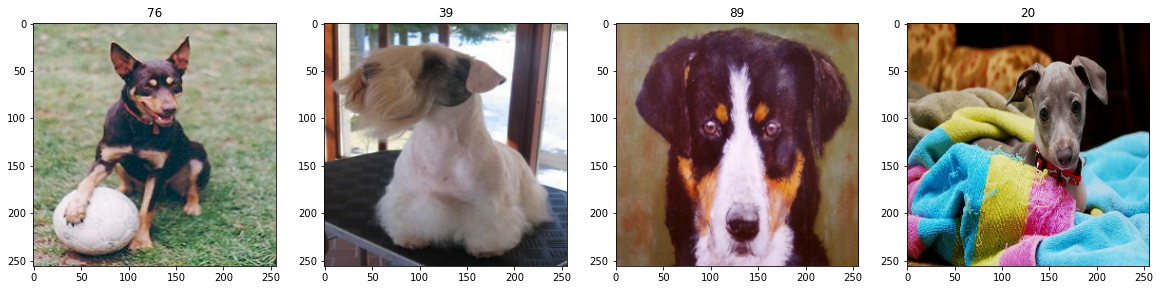

In [23]:
# Peeking at the images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

In [24]:
# Scaling the data between 0-1 for Normalization
data_gen = data_gen.map(lambda x, y: (x/255, y))
scaled_iterator = data_gen.as_numpy_iterator()

In [25]:
batch = scaled_iterator.next()
batch[0].max()
batch[0].min()

1.0

0.0

In [26]:
# Creating test and training set
# Train and Val partitions are used in training, test will evaluate the results later
train_size = int(len(data_gen)*.7)
val_size = int(len(data_gen)*.2)
test_size = int(len(data_gen)*.1)

In [27]:
len(data_gen) #Batch count, each containing 32 images

644

In [29]:
# Using the TensorFlow package to actually grab the data partitions of appropriate size
# Data is already shuffled so no need to shuffle before allocating
train = data_gen.take(train_size)
# Skip will skip the batches that were already allocated
val = data_gen.skip(train_size).take(val_size)
test = data_gen.skip(train_size+val_size).take(test_size)

In [31]:
# Importing libraries for the deep learning model
from tensorflow.keras.models import Sequential
# Conv2D = 2D convolutional layer, or spatial convolution over images
# MaxPoolingwD = Condensing layer and can find max/min values in regions
# Dense = fully connected layer through keras
# Flatten = Take convolution layer with channels and reduces it to a format that Dense can take
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
model = Sequential()

In [33]:
# Adding layers

# Adding convolution and max pooling layers
# 16 filters, 3x3 pixels, 1 stride(scan movement), relu activation function, image shape is 256x256 x 3 channels
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# Condenses small regions (2x2 pixels) into a max value to reduce size
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Reduce outputs to a single value
model.add(Flatten())

# Adding fully connected layers
# 256 values as output
model.add(Dense(256, activation='relu'))
# Finally 1 value as output, with a 0 or 1 output from sigmoid
model.add(Dense(1, activation='sigmoid'))
